# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*
Data Validation: This was done by;
. Checking for data types
. Checking for missing values
. Filling in missing values using the mean imputation technique
. Removing 'as a snack' description from servings column
. Encoding High_traffic column into 1 and 0; where 1 is 'High' and 0 for 'NaN' as representations of High and assuming 'NaN' is Low
. Parsing Calories and Servings Columns into calories_per_serving
. Checked the distribution of labels.. y_train showed the data was slightly imbalanced, with a 60:40 ratio. 


Exploratory Data Analysis(EDA): This was done by;
. Performing a preliminary analysis of the data to gain insights into the relationships between variables, and the distribution of data. Use visualizations like histograms, heat map and bar plots to help understand the data better.
. I used Correlation matrix to show the correlation between all pairs of columns in the dataframe, where values close to 1 indicate strong positive correlation and values close to -1 indicate strong negative correlation. The resulting matrix was visualised in a heatmap. The map showed that there was the strongest correlation between carbohydrate foods and high traffic compared to the food categories. Recipes containing sugar had the least correlation to the high traffic, when compared to the other food categories.
. The histograms show the recipes positively right skewed on the graph in terms of calories, carbohydrate, protein and sugar.
. The bar plot shows the frequency of other features as with high traffic; with potato and vegetables respectively as the most frequent food categories in the dataset , and beverages as the least frequent food category. it also shows 4 servings recipes as the most frequent recipe in the dataset, and most of the recipes had high traffic.


Model Development
. I used 'sklearn' packages like;
	-train_test_split to split my dataset into testing and training datasets
    -SimpleImputer to fill in missing values, using mean as the strategy
. Converted categorical variables to numerical variables using '.get_dummy' function
. Chose relevant columns and defined the features and target variable
. Split the data into training and testing sets using train_test_split method
. Defined the models; This is a binary classification problem, where the objective is to predict if a recipe will lead to high traffic or not...
	-logistic regression as baseline model
    -decision tree as a comparison model
    -random forest(as a comparison model to combine multiple decision trees to improve the model's performance and reduce overfitting)

Model Evaluation
. Evaluated the models using accuracy score, precision score, recall score, F1-score, cross_valuation_score for model generalisation and MAE on the test set.. and the performance scores were;
	-logistic regression:
    	.accuracy = 0.7473684210526316
        .precision = 0.776
        .recall = 0.8290598290598291
        .F1-score = 0.8016528925619835
        .cross_value_score = -0.2443157894736842
        .MAE = 0.25263157894736843
    -decision tree:
   		.accuracy = 0.6526315789473685
        .precision = 0.7107438016528925
        .recall = 0.7350427350427351
        .F1-score = 0.7226890756302521
        .cross_value_score = -0.3501403508771929
        .MAE = 0.3473684210526316
    -random forest:
    	.accuracy = 0.7421052631578947
        .precision = 0.7698412698412699
        .recall = 0.8290598290598291
        .F1-score = 0.7983539094650206
        .cross_value_score = -0.28524561403508775
        .MAE = 0.2578947368421053
        
The performance of the three models was evaluated based on accuracy, recall, precision and F1 scores.. the F1 score, which is the suitable metric for imbalanced datasets(60:40 here) as it balances precision and recall. The F1 score of the baseline model was 0.801, while the F1 score of the comparison model was 0.798. Therefore, the baseline model outperformed the comparison model.

Based on Hyperparameter tuning, the models had different improved accuracy scores, but same for the random forest model;
   Logistic Regression - 0.7684210526315789,
   Decision Tree - 0.7631578947368421
   Random Forest - 0.7421052631578947


Definition of Metric for Business Monitoring;
The metric to monitor the performance of the models on the business data should be the F1 score, as it balances precision and recall, and it is appropriate for imbalanced datasets.
The initial value for the F1 score based on the current data is 0.801.


Final Summary and Recommendations:

- The Exploratory analysis done on the dataset showed that recipes containing; potatoes, vegetables, and pork are at the top of food categories with high traffic. It also showed that recipes with 4 servings, had the most frequency of high traffic. The company can priorotize on these food categories and recipes with 4 servings when selecting recipes to promote on the website.
- The Logistic Regression outperformed the Random Forest in predicting if a recipe will pull high traffic or not. Therefore, it is recommended that the business uses the Logistic Regression model to prioritize which recipes to promote on the website.
- The business should monitor the F1 score to ensure the model's performance is optimized. It is recommended to collect more data to improve the model's accuracy and to explore other models or techniques that may further improve the performance.

In [1]:
#import packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = None
pd.options.display.max_columns = None

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [2]:
"""Data Validation"""
#Import file
df = pd.DataFrame(pd.read_csv("recipe_site_traffic_2212.csv"))

#Display file
print(df.head())

   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  


In [3]:
#Data Type?
df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [4]:
#missing values check
print(df.isna().sum())

#remove 'as a snack' description from servings column
df['servings'] = df['servings'].apply(lambda x: x[:-11] if 'as a snack' in x else x)

df['servings'] = df['servings'].astype(float)

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [5]:
#Feature Enfineering
#'High_traffic' column
df['high_traffic_yn'] = df["high_traffic"].apply(lambda x: 1 if x == 'High' else 0)

#Parsing Calories and Servings Columns into calories_per_serving
df['calories_per_serving'] = df['calories']/df['servings']

print(df)

     recipe  calories  carbohydrate   sugar  protein        category  \
0         1       NaN           NaN     NaN      NaN            Pork   
1         2     35.48         38.56    0.66     0.92          Potato   
2         3    914.28         42.68    3.09     2.88       Breakfast   
3         4     97.03         30.56   38.63     0.02       Beverages   
4         5     27.05          1.85    0.80     0.53       Beverages   
5         6    691.15          3.46    1.65    53.93   One Dish Meal   
6         7    183.94         47.95    9.75    46.71  Chicken Breast   
7         8    299.14          3.17    0.40    32.40    Lunch/Snacks   
8         9    538.52          3.78    3.37     3.79            Pork   
9        10    248.28         48.54    3.99   113.85         Chicken   
10       11    170.12         17.63    4.10     0.91       Beverages   
11       12    155.80          8.27    9.78    11.55       Breakfast   
12       13    274.63         23.49    1.56     2.57          Po

In [6]:
#Data description
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic_yn,calories_per_serving
count,947.000000,895.000000,895.000000,895.000000,895.000000,947.000000,947.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296,3.477297,0.606125,191.214301
std,273.519652,453.020997,43.949032,14.679176,36.369739,1.732741,0.488866,290.149519
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000,0.000000,0.070000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000,0.000000,33.693750
50%,474.000000,288.550000,21.480000,4.550000,10.800000,4.000000,1.000000,93.571667
75%,710.500000,597.650000,44.965000,9.800000,30.200000,4.000000,1.000000,225.240000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000,1.000000,2332.320000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recipe                947 non-null    int64  
 1   calories              895 non-null    float64
 2   carbohydrate          895 non-null    float64
 3   sugar                 895 non-null    float64
 4   protein               895 non-null    float64
 5   category              947 non-null    object 
 6   servings              947 non-null    float64
 7   high_traffic          574 non-null    object 
 8   high_traffic_yn       947 non-null    int64  
 9   calories_per_serving  895 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 74.1+ KB


In [8]:
"""Replace missing values in columns with mmost frequent imputaion"""
from sklearn.impute import SimpleImputer

# Pre-process the data to handle missing values 
mode_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")

df[["carbohydrate", "sugar", "protein"]] = mode_imputer.fit_transform(df[["carbohydrate", "sugar", "protein"]])
df[["calories", "calories_per_serving"]] = mean_imputer.fit_transform(df[["calories", "calories_per_serving"]])
                                                                      
print(df)

     recipe     calories  carbohydrate   sugar  protein        category  \
0         1   435.939196          3.46    1.51     0.36            Pork   
1         2    35.480000         38.56    0.66     0.92          Potato   
2         3   914.280000         42.68    3.09     2.88       Breakfast   
3         4    97.030000         30.56   38.63     0.02       Beverages   
4         5    27.050000          1.85    0.80     0.53       Beverages   
5         6   691.150000          3.46    1.65    53.93   One Dish Meal   
6         7   183.940000         47.95    9.75    46.71  Chicken Breast   
7         8   299.140000          3.17    0.40    32.40    Lunch/Snacks   
8         9   538.520000          3.78    3.37     3.79            Pork   
9        10   248.280000         48.54    3.99   113.85         Chicken   
10       11   170.120000         17.63    4.10     0.91       Beverages   
11       12   155.800000          8.27    9.78    11.55       Breakfast   
12       13   274.630000 

In [9]:
print(df.isna().sum())

recipe                    0
calories                  0
carbohydrate              0
sugar                     0
protein                   0
category                  0
servings                  0
high_traffic            373
high_traffic_yn           0
calories_per_serving      0
dtype: int64


In [10]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic_yn,calories_per_serving
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,435.939196,33.333981,8.632714,22.843020,3.477297,0.606125,191.214301
std,273.519652,440.394131,43.327268,14.373047,35.769376,1.732741,0.488866,282.062302
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000,0.000000,0.070000
25%,237.500000,114.410000,6.770000,1.510000,2.290000,2.000000,0.000000,35.753750
50%,474.000000,313.530000,19.440000,4.140000,9.640000,4.000000,1.000000,104.330000
75%,710.500000,576.225000,42.590000,9.285000,28.530000,4.000000,1.000000,213.220000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000,1.000000,2332.320000


In [11]:
"""Exploratory Data Analysis"""
#calculate the correlation matrix
Correlation_matrix = df.corr()

print(Correlation_matrix)

                        recipe  calories  carbohydrate     sugar   protein  \
recipe                1.000000  0.012525      0.041894 -0.027088 -0.057112   
calories              0.012525  1.000000     -0.028567 -0.096604  0.170484   
carbohydrate          0.041894 -0.028567      1.000000  0.092243 -0.016505   
sugar                -0.027088 -0.096604      0.092243  1.000000 -0.079090   
protein              -0.057112  0.170484     -0.016505 -0.079090  1.000000   
servings              0.029660 -0.033850     -0.024833 -0.013828 -0.024228   
high_traffic_yn       0.028159  0.072569      0.066057 -0.081640  0.032227   
calories_per_serving -0.030534  0.717184     -0.016493 -0.080828  0.114737   

                      servings  high_traffic_yn  calories_per_serving  
recipe                0.029660         0.028159             -0.030534  
calories             -0.033850         0.072569              0.717184  
carbohydrate         -0.024833         0.066057             -0.016493  
sugar    

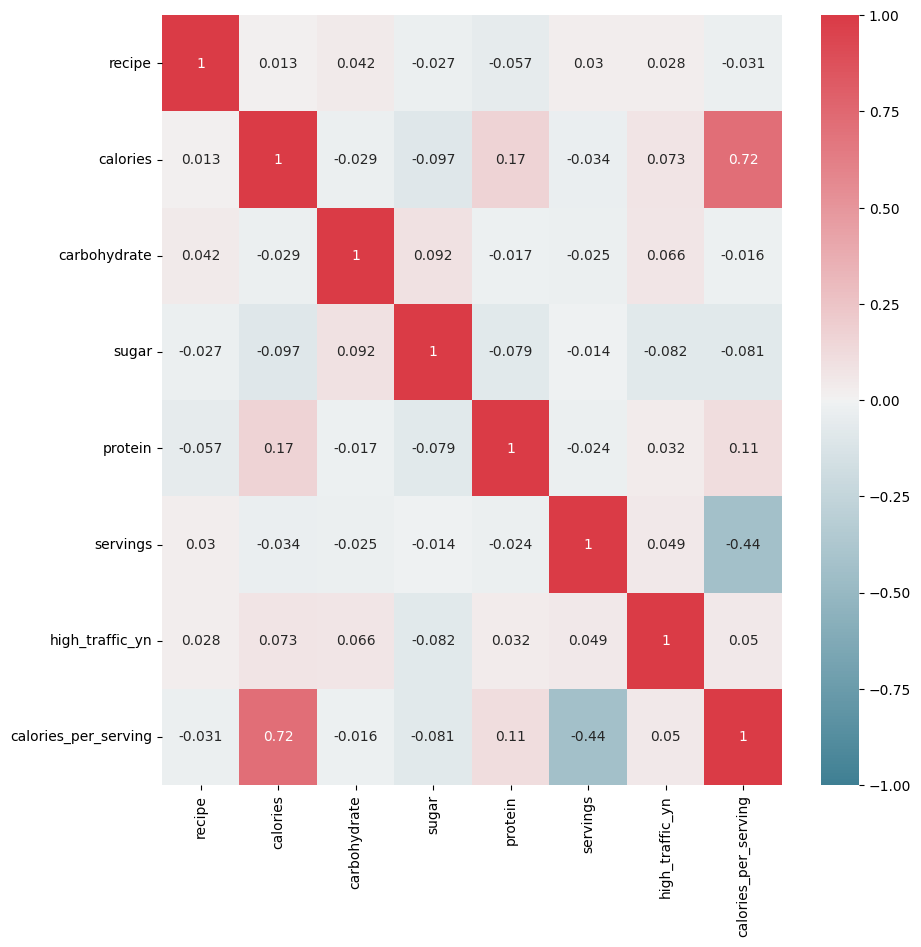

In [12]:
# Create a heatmap of the correlation matrix using Matplotlib
plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap=cmap)
plt.show()

<AxesSubplot: >

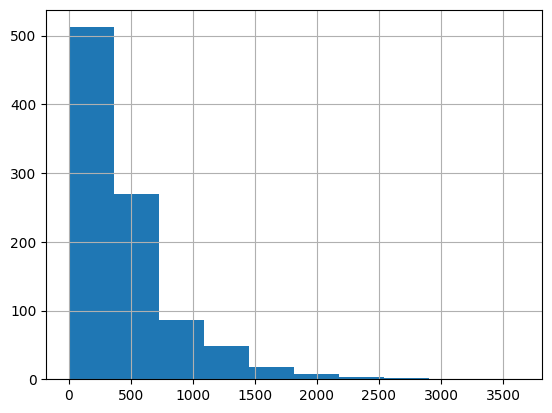

In [13]:
df.calories.hist()

<AxesSubplot: >

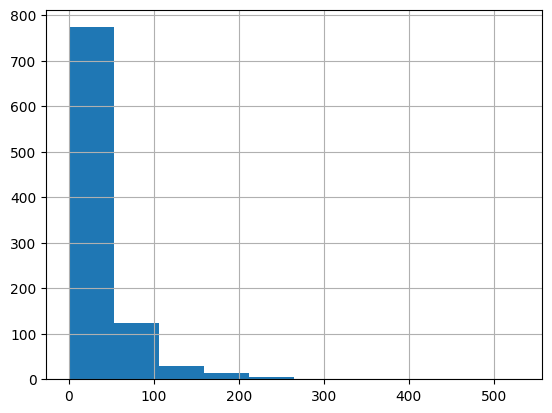

In [14]:
df.carbohydrate.hist()

<AxesSubplot: >

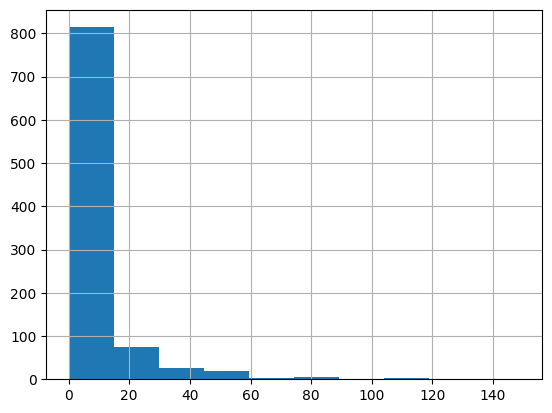

In [15]:
df.sugar.hist()

<AxesSubplot: >

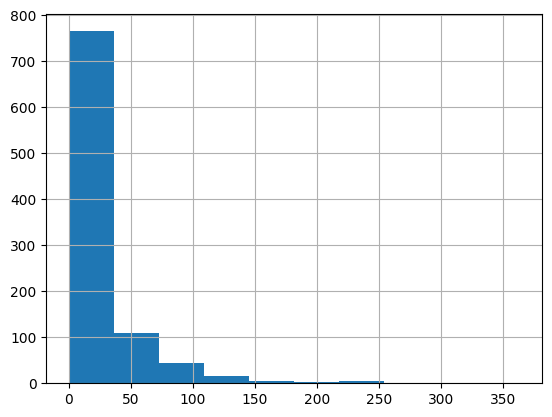

In [16]:
df.protein.hist()

Graph for category: Total - 11


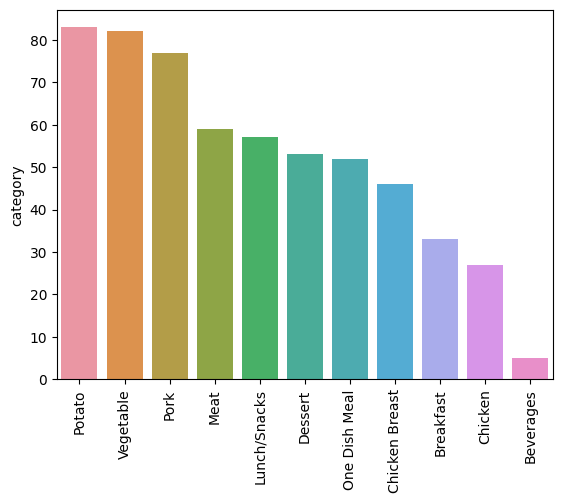

Graph for servings: Total - 4


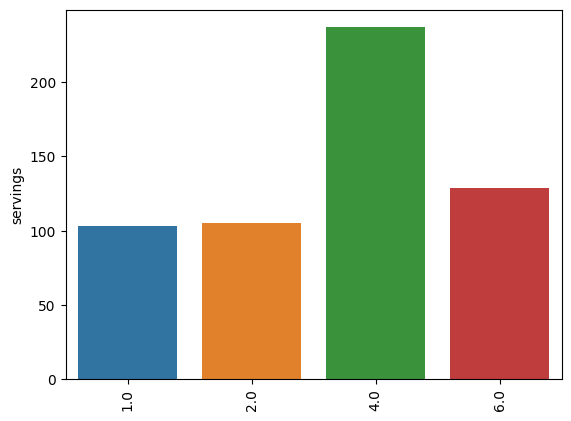

In [18]:
df_cat = df[['category', 'servings', 'high_traffic_yn']]

#loop a barchart for df_cat2 categories
for i in df_cat.columns:
    if i != 'high_traffic_yn' and df_cat['high_traffic_yn'].sum() > 0:
        column_num = df_cat[df_cat['high_traffic_yn'] == 1][i].value_counts()
        if len(column_num) > 0:
            print("Graph for %s: Total - %d" %(i, len(column_num)))
            chart = sns.barplot(x=column_num.index, y=column_num)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
            plt.show()


In [19]:
#import packages
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
# Convert categorical variables to numerical
#get dummy
df_dummy = pd.get_dummies(df, columns=["category"], drop_first=True)

In [21]:
df_dummy

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,high_traffic_yn,calories_per_serving,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,1,435.939196,3.46,1.51,0.36,6.0,High,1,191.214301,0,0,0,0,0,0,0,1,0,0
1,2,35.480000,38.56,0.66,0.92,4.0,High,1,8.870000,0,0,0,0,0,0,0,0,1,0
2,3,914.280000,42.68,3.09,2.88,1.0,NaN,0,914.280000,1,0,0,0,0,0,0,0,0,0
3,4,97.030000,30.56,38.63,0.02,4.0,High,1,24.257500,0,0,0,0,0,0,0,0,0,0
4,5,27.050000,1.85,0.80,0.53,4.0,NaN,0,6.762500,0,0,0,0,0,0,0,0,0,0
5,6,691.150000,3.46,1.65,53.93,2.0,High,1,345.575000,0,0,0,0,0,0,1,0,0,0
6,7,183.940000,47.95,9.75,46.71,4.0,NaN,0,45.985000,0,0,1,0,0,0,0,0,0,0
7,8,299.140000,3.17,0.40,32.40,4.0,NaN,0,74.785000,0,0,0,0,1,0,0,0,0,0
8,9,538.520000,3.78,3.37,3.79,6.0,High,1,89.753333,0,0,0,0,0,0,0,1,0,0
9,10,248.280000,48.54,3.99,113.85,2.0,NaN,0,124.140000,0,1,0,0,0,0,0,0,0,0


In [22]:
"""Model Development"""
df_dummy.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'high_traffic', 'high_traffic_yn', 'calories_per_serving',
       'category_Breakfast', 'category_Chicken', 'category_Chicken Breast',
       'category_Dessert', 'category_Lunch/Snacks', 'category_Meat',
       'category_One Dish Meal', 'category_Pork', 'category_Potato',
       'category_Vegetable'],
      dtype='object')

In [23]:
#Choose relevant columns
#Define the features and target variable
X = df_dummy.drop(["recipe", "calories_per_serving", "high_traffic", 'high_traffic_yn'], axis=1)
y = df_dummy["high_traffic_yn"]

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (757, 15)
train size y :  (757,)
test size X :  (190, 15)
test size y :  (190,)


In [25]:
#check for distribution of labels
y_train.value_counts(normalize=True)

1    0.603699
0    0.396301
Name: high_traffic_yn, dtype: float64

In [26]:
# Define the models
# Fit the models on the training data
logistic_regression = LogisticRegression(random_state=40)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [27]:
# Set up our K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=40)

np.mean(cross_val_score(logistic_regression, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = kf))

-0.2443157894736842

In [28]:
decision_tree = DecisionTreeClassifier(random_state=40)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [29]:
np.mean(cross_val_score(decision_tree, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = kf))

-0.3501403508771929

In [30]:
random_forest = RandomForestClassifier(random_state=40)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [31]:
np.mean(cross_val_score(random_forest, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = kf))

-0.28524561403508775

In [32]:
# Evaluate the models using accuracy, precision, recall, F1-score, and MAE
#Cross validation to check model generalisation
from sklearn.model_selection import cross_val_score

# Evaluate the models on the test set
log_reg_pred = logistic_regression.predict(X_test)
tree_pred = decision_tree.predict(X_test)
forest_pred = random_forest.predict(X_test)

In [33]:
# Create the classification report for the models
from sklearn.metrics import classification_report

class_rep_log_reg = classification_report(y_test, log_reg_pred)
class_rep_tree = classification_report(y_test, tree_pred)
class_rep_forest = classification_report(y_test, forest_pred)

In [34]:
print("Logistic Regression: \n", class_rep_log_reg)
print("Decision Tree: \n", class_rep_tree)
print("Random Forest: \n", class_rep_forest)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        73
           1       0.78      0.83      0.80       117

    accuracy                           0.75       190
   macro avg       0.73      0.72      0.73       190
weighted avg       0.74      0.75      0.74       190

Decision Tree: 
               precision    recall  f1-score   support

           0       0.55      0.52      0.54        73
           1       0.71      0.74      0.72       117

    accuracy                           0.65       190
   macro avg       0.63      0.63      0.63       190
weighted avg       0.65      0.65      0.65       190

Random Forest: 
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        73
           1       0.77      0.83      0.80       117

    accuracy                           0.74       190
   macro avg       0.73      0.72      0.72       190
weighted avg     

In [35]:
log_reg_acc = accuracy_score(y_test, log_reg_pred)
tree_acc = accuracy_score(y_test, tree_pred)
forest_acc = accuracy_score(y_test, forest_pred)

In [36]:
print("The Logistic regression model accuracy score is: " + str(log_reg_acc))
print("The Decision tree model accuracy score is: " + str(tree_acc))
print("The Random forest model accuracy score is: " + str(forest_acc))

The Logistic regression model accuracy score is: 0.7473684210526316
The Decision tree model accuracy score is: 0.6526315789473685
The Random forest model accuracy score is: 0.7421052631578947


In [37]:
log_reg_prec = precision_score(y_test, log_reg_pred)
tree_prec = precision_score(y_test, tree_pred)
forest_prec = precision_score(y_test, forest_pred)

In [38]:
print("The Logistic regression model precision score is: " + str(log_reg_prec))
print("The Decision tree model precision score is: " + str(tree_prec))
print("The Random forest model precision score is: " + str(forest_prec))

The Logistic regression model precision score is: 0.776
The Decision tree model precision score is: 0.7107438016528925
The Random forest model precision score is: 0.7698412698412699


In [39]:
log_reg_rec = recall_score(y_test, log_reg_pred)
tree_rec = recall_score(y_test, tree_pred)
forest_rec = recall_score(y_test, forest_pred)

In [40]:
print("The Logistic regression model recall score is: " + str(log_reg_rec))
print("The Decision tree model recall score is: " + str(tree_rec))
print("The Random forest model recall score is: " + str(forest_rec))

The Logistic regression model recall score is: 0.8290598290598291
The Decision tree model recall score is: 0.7350427350427351
The Random forest model recall score is: 0.8290598290598291


In [41]:
log_reg_f1 = f1_score(y_test, log_reg_pred)
tree_f1 = f1_score(y_test, tree_pred)
forest_f1 = f1_score(y_test, forest_pred)

In [42]:
print("The Logistic regression model F1 score is: " + str(log_reg_f1))
print("The Decision tree model F1 score is: " + str(tree_f1))
print("The Random forest model F1 score is: " + str(forest_f1))

The Logistic regression model F1 score is: 0.8016528925619835
The Decision tree model F1 score is: 0.7226890756302521
The Random forest model F1 score is: 0.7983539094650206


In [43]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

mae_log_reg = mean_absolute_error(y_test, log_reg_pred)
mae_tree = mean_absolute_error(y_test, tree_pred)
mae_forest = mean_absolute_error(y_test, forest_pred)

In [44]:
print("The Logistic regression model MAE is: " + str(mae_log_reg))
print("The Decision tree model MAE is: " + str(mae_tree))
print("The Random forest model MAE is: " + str(mae_forest))

The Logistic regression model MAE is: 0.25263157894736843
The Decision tree model MAE is: 0.3473684210526316
The Random forest model MAE is: 0.2578947368421053


In [45]:
#performing GridSearchCV to improve the model's ability to predict traffic for recipes on website
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [46]:
#Hyperparameters
# Define the grid of values for tol and max_iter
tol = [0.0001, 0.1, 1]
max_iter = [100, 150, 200]
penalty = [None, 'l1', 'l2', 'elasticnet']
C = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
solver = ['liblinear']
multi_class = ['auto']

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid_logit = dict(tol=tol , max_iter=max_iter, penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Instantiate GridSearchCV with the required parameters
grid_model_logit = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_logit, cv=kf)

# Fit grid_model to the data
grid_model_result_logit = grid_model_logit.fit(X_train, y_train)

# Summarize results
logit_best_score, logit_best_params = grid_model_result_logit.best_score_, grid_model_result_logit.best_params_
print("Best: %f using %s" % (logit_best_score, logit_best_params))

# Extract the best model and evaluate it on the test set
logit_best_model = grid_model_result_logit.best_estimator_
print("Accuracy of logistic regression classifier: ", logit_best_model.score(X_test, y_test))

Best: 0.763632 using {'C': 5.0, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Accuracy of logistic regression classifier:  0.7684210526315789


In [47]:
# Define the parameter grid to search over
param_grid_tree = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_model_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, cv=kf)

# Fit grid_model to the data
grid_model_result_tree = grid_model_tree.fit(X_train, y_train)

# Summarize results
tree_best_score, tree_best_params = grid_model_result_tree.best_score_, grid_model_result_tree.best_params_
print("Best: %f using %s" % (tree_best_score, tree_best_params))

# Extract the best model and evaluate it on the test set
tree_best_model = grid_model_result_tree.best_estimator_
print("Accuracy of decision tree classifier: ", tree_best_model.score(X_test, y_test))

Best: 0.760982 using {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy of decision tree classifier:  0.7631578947368421


In [48]:
# Define the parameters to tune in the Random Forest Classifier model
param_grid_forest = {
    'n_estimators': [20, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [4, 8, 16],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_model_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_forest, cv=kf, n_jobs=-1)

# Fit grid_model to the data
grid_model_result_forest = grid_model_forest.fit(X_train, y_train)

# Summarize results
forest_best_score, forest_best_params = grid_model_result_forest.best_score_, grid_model_result_forest.best_params_
print("Best: %f using %s" % (forest_best_score, forest_best_params))

# Extract the best model and evaluate it on the test set
forest_best_model = grid_model_result_forest.best_estimator_
print("Accuracy of random forest classifier: ", forest_best_model.score(X_test, y_test))

Best: 0.749070 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 100}
Accuracy of random forest classifier:  0.7421052631578947
